# Space Fund Realty (SFR) Analysis

The objective of this project is to analyze the SFR (SpaceFund Realty) of the aerospace companies and their missions in order to help the investors to make better decisions. The SFR is a rating for the companies based on their missions, payload, launch cost and other factors, which tells how developed the company is and how stable it is. The SFR is a rating between 1-9. The higher the rating, the more developed the company is.

### Data Dictionary

| Column Name | Description |
| --- | --- |
|Company|Name of the company|
|SFR|SpaceFund Realty rating of the company|
|Payload(kg)|Payload of the mission|
|Launch Cost(million USD)|Launch cost of the mission|
|Price per kg|Price per kg payload of the mission|
|Launch Class|Launch class of the mission|
|Orbit Altitude|Orbit altitude of the mission|
|Tech Type|Technology type of the mission|
|Country|Country of the company|
|HQ Location|Headquarters location of the company|
|Description|Description of the mission|

In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Loading the dataset
df = pd.read_csv('Launch SFR.csv')
df.head()

,Company,SFR,Payload (kg),Launch Cost ($M),Price ($/kg),Funding ($M),Launch Class,Orbit Altitude,Tech Type,Country,HQ Location,Description
0,Arianespace/Avio,9,"20,000",170.00,"8,500",Public,"Medium, Heavy",LEO,Rocket,Italy,Colleferro,Developing the Vega & Ariane launch vehicles
1,Astra Space,9,300,3.95,"13,167",Public,Small,LEO,Rocket,United States,"Alameda, CA",Providing routine launch access to Earth orbit...
2,Black Sky Aerospace,9,350,0.60,"1,714",-,Small,Suborbital,Rocket,Australia,"Browns Plains, Queensland","Offers a range of sounding rockets, capable of..."
3,Blue Origin,9,0,0.00,0,-,"Tourism, Small, Heavy",Suborbital,Rocket,United States,"Kent, WA",Lowering the cost of access to space with reus...
4,CNIM Air Space,9,"2,700",0.00,0,Public,"Small, Medium",Suborbital,Balloon,France,Ayguesvives,Balloons that lift anything from a few kilogra...


## Data Preprocessing

In [3]:
#Checking the shape of the dataset
df.shape

(183, 12)

In [4]:
#Checking the datatypes of the columns
df.dtypes

Company              object
SFR                   int64
Payload (kg)         object
Launch Cost ($M)    float64
Price ($/kg)         object
Funding ($M)         object
Launch Class         object
Orbit Altitude       object
Tech Type            object
Country              object
HQ Location          object
Description          object
dtype: object

In [5]:
#type casting
df['Payload (kg)'] = df['Payload (kg)'].astype(str).str.replace(',', '').astype(float)
df['Launch Cost ($M)'] = df['Launch Cost ($M)'].astype(str).str.replace(',', '').astype(float)
df['Price ($/kg)'] = df['Price ($/kg)'].astype(str).str.replace(',', '').astype(float)

In [6]:
#Checking '-' (null values) values in the dataset
df.isin(['-']).sum()

Company               0
SFR                   0
Payload (kg)          0
Launch Cost ($M)      0
Price ($/kg)          0
Funding ($M)        110
Launch Class         16
Orbit Altitude        3
Tech Type             0
Country               0
HQ Location           8
Description           0
dtype: int64

The majority of the data in the column Funding ($M) is missing, so I will be dropping this column and replacing the missing values in Launch Class and Orbit Altitude with mode of their respective columns.

In [7]:
#droping the column
df.drop(['Funding ($M)'], axis=1, inplace=True)

#replacing the '-' values with mode
df['Launch Class'].replace('-', df['Launch Class'].mode()[0], inplace=True)
df['Orbit Altitude'].replace('-', df['Orbit Altitude'].mode()[0], inplace=True)

Dropping HQ location column because the country of origin is already there.

In [8]:
df.drop(['HQ Location'], axis=1, inplace=True)

In [9]:
#Checking for unique values in the dataset
df.nunique()

Company             183
SFR                  10
Payload (kg)         65
Launch Cost ($M)     46
Price ($/kg)         53
Launch Class         10
Orbit Altitude        4
Tech Type             8
Country              31
Description         183
dtype: int64

In [10]:
cols = ['Launch Class', 'Orbit Altitude', 'Tech Type']
for i in cols:
    print(i, df[i].unique(), '\n')

Launch Class ['Medium, Heavy' 'Small' 'Tourism, Small, Heavy' 'Small, Medium'
 'Heavy, Super Heavy' 'Tourism' 'Medium' 'Small, Heavy' 'Tourism, Medium'
 'Heavy'] 

Orbit Altitude ['LEO' 'Suborbital' 'GTO' 'Lunar'] 

Tech Type ['Rocket' 'Balloon' 'Balloon, Rocket' 'Spaceplane' 'Plane, Rocket' 'Other'
 'Rocket, Other' 'Rocket, Spaceplane'] 



In [11]:
def l_class(launch):
    if launch in ['Medium, Heavy','Medium']:
        return 'Medium'
    elif launch in ['Small', 'Small, Medium', 'Small, Heavy']:
        return 'Small'
    elif launch in ['Heavy', 'Heavy, Super Heavy']:
        return 'Heavy'
    elif launch in ['Tourism', 'Tourism, Small, Heavy','Tourism, Medium']:
        return 'Tourism'
df['Launch Class'] = df['Launch Class'].apply(l_class)

In [12]:
df['Launch Class'].value_counts()

Launch Class
Small      152
Medium      15
Tourism     10
Heavy        6
Name: count, dtype: int64

In [13]:
def tech_type(tech):
    if tech in ['Rocket', 'Plane, Rocket', 'Rocket, Other', 'Rocket, Spaceplane']:
        return 'Rocket'
    elif tech in ['Ballon', 'Balloon, Rocket']:
        return 'Balloon'
    elif tech in ['Spaceplane']:
        return 'Spaceplane'
    else:
        return 'Other'
df['Tech Type'] = df['Tech Type'].apply(tech_type)

In [14]:
df['Tech Type'].value_counts()

Tech Type
Rocket        133
Other          23
Spaceplane     20
Balloon         7
Name: count, dtype: int64

#### Grouping the companies by their description
The descirption column has all the unique values, so I will be categorizing them into 7 categories. These categories are based on description of each company.
Categories:
1. Launch Vehicle Development
2. Launch Services
3. Balloon-Based Technologies
4. Space Tourism and Suborbital
5. Satellite Technology and Services
6. Innovative Propulsion Technologies
7. Space Access and Technology Innovation

In [15]:
def description(description):
    if description in [
    'Developing the Vega & Ariane launch vehicles',
    'Developing the Ceres-1 and Pallas-1 launch vehicles',
    'Developing the Firefly Alpha launch vehicle; highest payload performance with the lowest cost per kg to orbit in its vehicle class',
    'Developing suborbital rockets to provide access and research for traditional and ‘New-Space’ markets',
    'The first rocket company and launch site for cubesat payloads in New Zealand',
    'Developing the ERIS launch vehicles to provide reliable and cost-effective access to space',
    'Buildig the Xogdor rocket to test payloads at supersonic speeds and at the edge of space',
    'Building a private 3-stage nanosatellite launch vehicle in China',
    'Developing the LAROS-RC2 orbital carrier and accompanying mobile launch infrastructure',
    'Developing the Trans-Atmospheric Flight Vehicle (TAV 1)',
    'Developing suborbital and orbital launch vehicles',
    'Developing a series of Launch Vehicles based on high-altitude air launch',
    'Building a hypersonic space plane that can takeoff from anywhere in any weather',
    'Developing a unique launch vehicle and propulsion system',
    'Building a space launch system for sending hardened satellites and bulk cargo into space',
    'Developing a reactive, reliable and cost-efficient nano-launcher',
    'Developing a next generation of reusable launch vehicles for microgravity research',
    'Building a reusable three-person rocket ship for space tourism',
    'Developing Infinity, a small reusable rocket',
    'Developing high-performance, low carbon micro launch vehicles']:
        return 'Launch Vehicle Development'
    elif description in [
    'Providing routine launch access to Earth orbit for entrepreneurs and enterprises',
    'Launch vehicle manufacturer and launch services provider',
    'Commercial launch vehicle manufacturer and space launch provider in China',
    'Launch services for small, micro and nano satellites',
    'Providing launch services to LEO at an affordable cost',
    'Enabling Low cost access to space with the Aerospike engined reusable Small satellite launch vehicle "MESO"',
    'Providing passengers with a trip into the stratosphere',
    'Provides earth-to-space space delivery services for small payloads',
    'Dedicated nanosatellite launch provider',
    'Rapid response small satellite launch vehicles for government and commercial customers',
    'Provding dedicated launch services for cube and nanosatellites',
    'Integrated launch services for the Zenit Launch Vehicle via a mobile sea platform',
    'Cost-effective small satellite launch services from the United Kingdom',
    'SpaceRyde offers affordable, on-schedule, dedicated launch for small sats',
    'Enabling transportation to LEO',
    'Reusable hybrid rocketry',
    'Developing a reliable tow-glider launch system',
    'Affordable and reliable small satellite launch system for LEO, SSO, and GEO missions',
    'Customized launch services for sub-orbital and orbital payloads',
    'SpaceBox is a suborbital launch and recovery platform designed to enable affordable access to space for educational, professional, consumer and hobbyist payloads']:
        return 'Launch Services'
    elif description in [
    'Offers a range of sounding rockets, capable of flights up to 300km in multistage configurations',
    'Balloons that lift anything from a few kilograms to several tons and are able to operate at an altitude as low as a few hundred meters or as high as 40 km',
    'Launching stratospheric balloons for research and promotional purposes',
    'Balloon-based small satellite launcher',
    'Building a ballooning platform to offer novel access to the mesosphere']:
        return 'Balloon-Based Technologies'
    elif description in [
    'Building rockets to launch small satellites',
    'Developing a zero-emission space tourism platform',
    'Personalized engineering support and dedicated airborne orbital launch platform',
    'Revolutionizing near space tourism and opening it to a greater audience']:
        return 'Space Tourism Suborbital'
    elif description in [
    'Designs, manufactures, and operates launch vehicles, propulsion systems, and satellites and related components',
    'Developing Dream Chaser, a multi-mission space utility vehicle designed to transport crew and cargo to low-Earth orbit',
    'A rocket, satellite, and spacecraft manufacturing company.',
    'Mass production of on-demand launchers for small sats',
    'Designing a single stage to orbit hypersonic vehicle of revolutionary design and propulsion capability',
    'Building a single-stage to orbit launch system dedicated to small payloads']:
        return 'Satellite Technology and Services'
    elif description in  [
    'Developing a unique line of rockets powered by bio-derived fuels to launch tiny satellites into space',
    'Using clean tech to develop a sustainable and cheap rocket called Haribon SLS',
    'Developing hybrid small satellite launch vehicles',
    'Privately developing rocket engines and suborbital launch vehicles in Japan',
    'Creating a reusable suborbital space complex for tourist flights into space',
    'Using RAM-accelerators to change the economics of space launch',
    'Developing a range of sustainable, reusable launchers dedicated to the launch of small satellites',
    'Developing electromagnetic launch systems to change how we launch payloads into space',
    'Redesigning launch from the ground up',
    'Developing SOL ASPIRET, a suborbital spaceplane',
    'Developing PROTEUS, an innovative hybrid and autonomous launcher for small sats']:
        return 'Innovative Propulsion Technologies'
    else:
        return 'Space Access and Technology Innovation'
df['Description'] = df['Description'].apply(description)

In [16]:
df['Description'].value_counts()

Description
Space Access and Technology Innovation    123
Launch Vehicle Development                 19
Launch Services                            18
Innovative Propulsion Technologies         10
Satellite Technology and Services           6
Space Tourism Suborbital                    4
Balloon-Based Technologies                  3
Name: count, dtype: int64

Descriptive Statistics

In [17]:
df.describe()

,SFR,Payload (kg),Launch Cost ($M),Price ($/kg)
count,183.000000,183.000000,183.000000,183.000000
mean,3.726776,2579.677596,4.840956,6587.256831
std,2.527148,8834.385310,19.132872,12755.241486
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,16.000000,0.000000,0.000000
50%,3.000000,186.000000,0.000000,0.000000
75%,5.000000,746.500000,1.500000,9250.000000
max,9.000000,63800.000000,170.000000,100000.000000


The descriptive statistics of the dataset shows that the minimum value of the Payload (kg), SFR, Price ($/kg) and Launch Cost ($M) is 0, which is not possible. I will be considering these values as missing values and will be replacing them with the mean/median of their respective columns.

In [18]:
df['Payload (kg)'] = df['Payload (kg)'].replace(0, df['Payload (kg)'].mean())
df['Launch Cost ($M)'] = df['Launch Cost ($M)'].replace(0, df['Launch Cost ($M)'].mean())
df['SFR'] = df['SFR'].replace(0, df['SFR'].median())

Removing column Price($/kg) because it is highly correlated with Launch Cost ($M).

Launch Cost = Price (per kg) * Payload (kg) / 1000

In [19]:
df.drop(columns = 'Price ($/kg)', axis=1, inplace=True)

In [20]:
df.head()

,Company,SFR,Payload (kg),Launch Cost ($M),Launch Class,Orbit Altitude,Tech Type,Country,Description
0,Arianespace/Avio,9,20000.000000,170.000000,Medium,LEO,Rocket,Italy,Launch Vehicle Development
1,Astra Space,9,300.000000,3.950000,Small,LEO,Rocket,United States,Launch Services
2,Black Sky Aerospace,9,350.000000,0.600000,Small,Suborbital,Rocket,Australia,Balloon-Based Technologies
3,Blue Origin,9,2579.677596,4.840956,Tourism,Suborbital,Rocket,United States,Space Access and Technology Innovation
4,CNIM Air Space,9,2700.000000,4.840956,Small,Suborbital,Other,France,Space Access and Technology Innovation


## Exploratory Data Analysis
In the exploratory data analysis, I will be looking at the distribution of the data to get a better understanding of the data. After that, I will be looking at the relationship between the dependent variable and the independent variables.

### Country of Origin

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'United Kingdom'),
  Text(2, 0, 'China'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Australia'),
  Text(5, 0, 'France'),
  Text(6, 0, 'Japan'),
  Text(7, 0, 'Canada'),
  Text(8, 0, 'Germany'),
  Text(9, 0, 'Russia'),
  Text(10, 0, 'Spain'),
  Text(11, 0, 'South Korea'),
  Text(12, 0, 'Netherlands'),
  Text(13, 0, 'Ukraine'),
  Text(14, 0, 'Argentina'),
  Text(15, 0, 'Brazil'),
  Text(16, 0, 'South Africa'),
  Text(17, 0, 'Thailand'),
  Text(18, 0, 'Czech Republic'),
  Text(19, 0, 'Luxembourg'),
  Text(20, 0, 'Uzbekistan'),
  Text(21, 0, 'Turkey'),
  Text(22, 0, 'Croatia'),
  Text(23, 0, 'Italy'),
  Text(24, 0, 'Malaysia'),
  Text(25, 0, 'Taiwan'),
  Text(26, 0, 'Norway'),
  Text(27, 0, 'Philippines'),
  Text(28, 0, 'Poland'),
  Text(29, 0, 'Sweden'),
  Text(30, 0, 'Pakistan

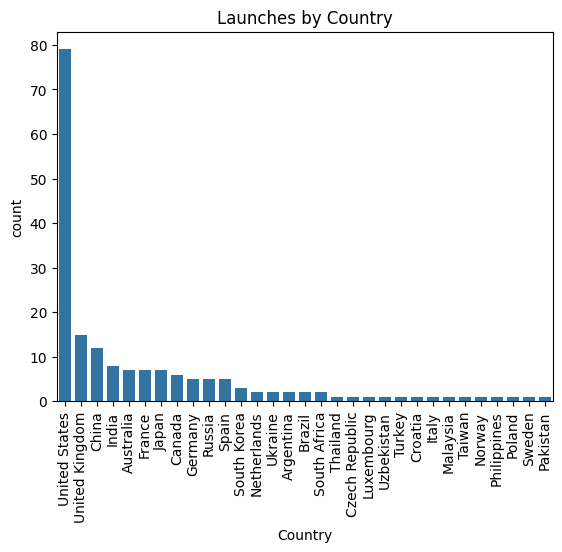

In [21]:
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index).set_title('Launches by Country')
plt.xticks(rotation=90)

This graph shows the number of launches by each country. Here United States has highest number of missions i.e. nearly 80, followed by United Kingdoms with 15 missions, than China WITH 13 missions and India with 9 missions. On the whole the top 5 countries are US, UK, China, India, (Australia, France and Japan) with equal number of missions.

### Tech Type

Text(0.5, 1.0, 'Launches by Tech Type')

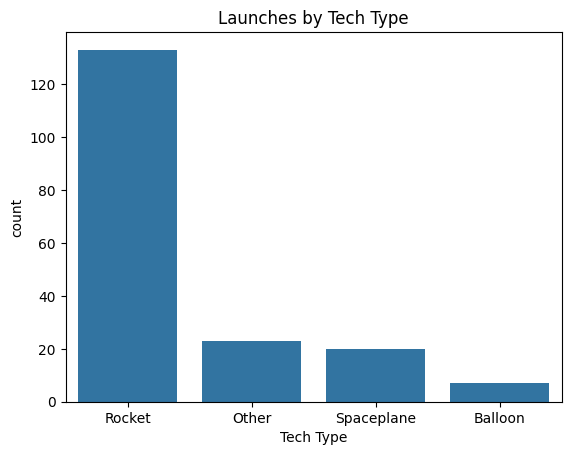

In [22]:
sns.countplot(x = 'Tech Type', data = df, order = df['Tech Type'].value_counts().index).set_title('Launches by Tech Type')

In the dataset, most of the missions were Rocket Type Missions, followed by miscellaneous missions, spaceplane and balloon missions. This graph gives use an idea about the complexity of the missions. Majority of the companies in the dataset are working on rocket type missions which means the comapnies are capable enough to build a rocket engine and launch it into space. The missions which involves spaceplane shows that these comapanies are working on resuable vehicles and could be working in the field of space tourism. The last category is balloon missions, which shows that these companies are working on balloon based technologies where they are carrying payloads to the edge of space and gathering data.

### Launch Class

Text(0.5, 1.0, 'Launches by Launch Class')

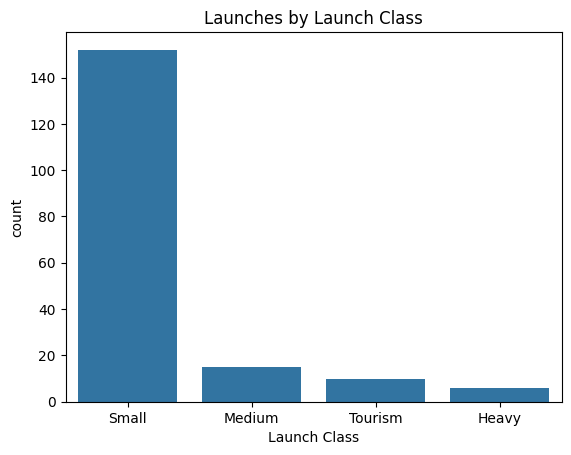

In [23]:
sns.countplot(x = 'Launch Class', data = df, order = df['Launch Class'].value_counts().index).set_title('Launches by Launch Class')

Majoirty of the missions include Small launch class, which means most of the companies are working on small launch vehicles which reflects that these companies are in their initial face of developing rockets. The second most common launch class is Medium, which means that some of the companies are working on medium launch vehicles which could be capable of carrying significant amount of payload. The third category is of Tourism, where comapnies are working on space tourism and suborbital missions. The last category is of Heavy, where companies are working on heavy launch vehicles which are capable of carrying heavy payloads.

### Orbit Altitude

Text(0.5, 1.0, 'Launches by Orbit Altitude')

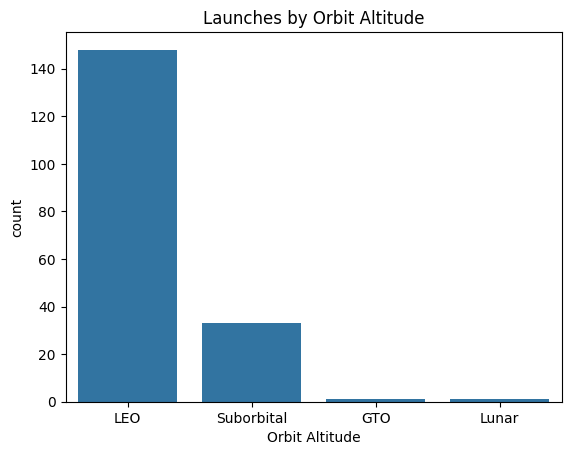

In [24]:
sns.countplot(x = 'Orbit Altitude', data = df, order = df['Orbit Altitude'].value_counts().index).set_title('Launches by Orbit Altitude')

This graph shows the orbit altitude of the missions. We can relate this graph with the previous graphs where, we discussed about the mission tech type and launch class and my hypothesis with them. More than 140 missions are of LEO (Low Earth Orbit), which means that most of the companies are working on small launch vehicles which are capable of carrying small payloads to LEO. The second most common orbit altitude is of Suborbital, which means that some of the companies are working on space tourism and suborbital missions. The third most common orbit altitude is of GTO (Geostationary Transfer Orbit), which means that some of the companies are working on missions which are capable of carrying heavy payloads to GTO. The last category is of Lunar, where companies are working on missions which are capable of carrying heavy payloads to Moon. 

### Company Description

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Space Access and Technology Innovation'),
  Text(1, 0, 'Launch Vehicle Development'),
  Text(2, 0, 'Launch Services'),
  Text(3, 0, 'Innovative Propulsion Technologies'),
  Text(4, 0, 'Satellite Technology and Services'),
  Text(5, 0, 'Space Tourism Suborbital'),
  Text(6, 0, 'Balloon-Based Technologies')])

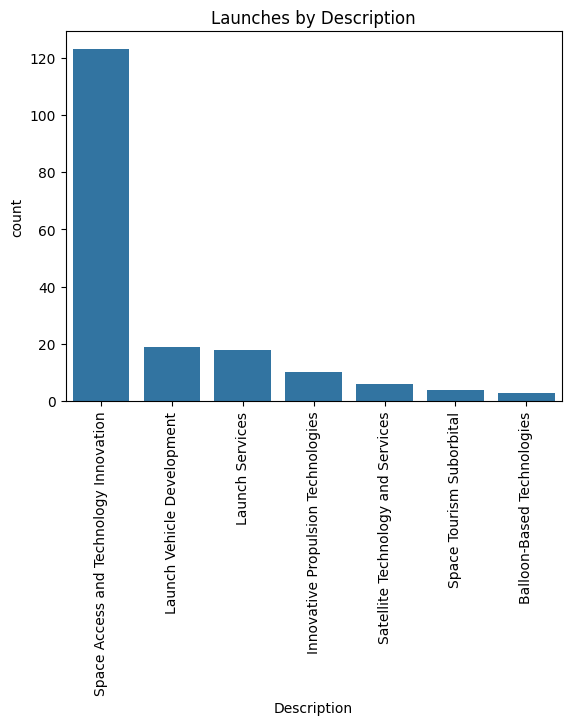

In [25]:
sns.countplot(x = 'Description', data = df, order = df['Description'].value_counts().index).set_title('Launches by Description')
plt.xticks(rotation=90)

This graphs provide us an overview of the companies through their description. Majority of the companies wwork for Space Access and Technology Innovation, followed by Launch Services and Launch Vehicle Development. Some companies are working on Innovative Propulsion Technologies, developing new propulsion systems. Few companies are working in the domain of Satellite Technology and Space Tourism and Suborbital. The last category is of Balloon-Based Technologies, where companies are working on balloon based technologies.

### Payload Distribution

Text(0.5, 1.0, 'Payload Distribution')

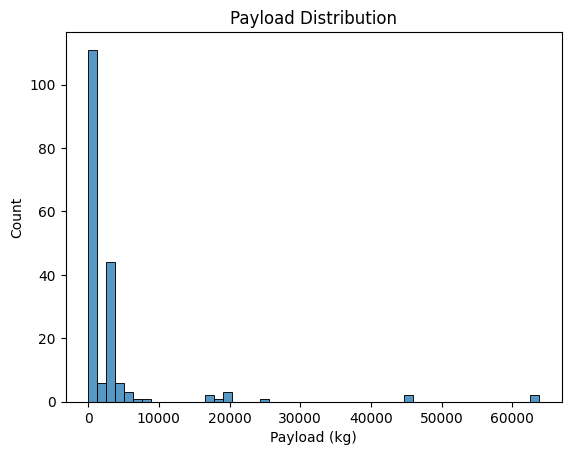

In [26]:
sns.histplot(x = 'Payload (kg)', data = df, bins = 50).set_title('Payload Distribution')

Majority of the missions have payload weight less than 1000 kg, followed by missions with payload weight between 1000 kg and 10000 kg. Some missions have payload weight near 20000kg which could possibly be the missions with heavy launch class. However, there are some missions with payload weight greater than 40000 kg which could possibly the outlier values.

### Launch Cost Distribution

Text(0.5, 1.0, 'Launch Cost Distribution')

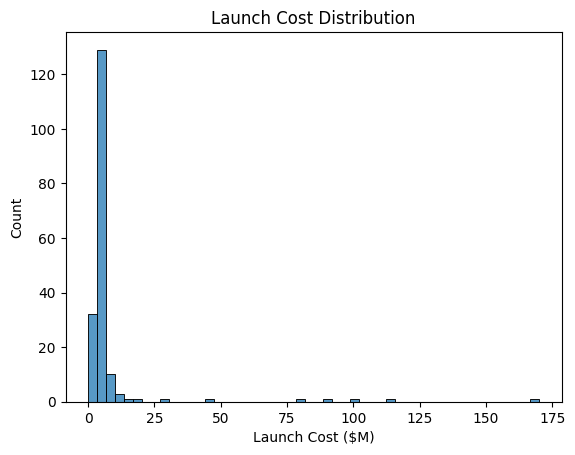

In [27]:
sns.histplot(x = 'Launch Cost ($M)', data = df, bins = 50).set_title('Launch Cost Distribution')

In the dataset, the majority of the launch cost is concentrated between 5-10 million dollars, with very few number of missions having launch cost greater than 100 million dollars. This graph also shows the scale of mission based on its expense. The missions with launch cost less than 5 million dollars are small scale missions, followed by medium scale missions with launch cost between 5-10 million dollars. 

### SFR Distribution

Text(0.5, 1.0, 'SFR Distribution')

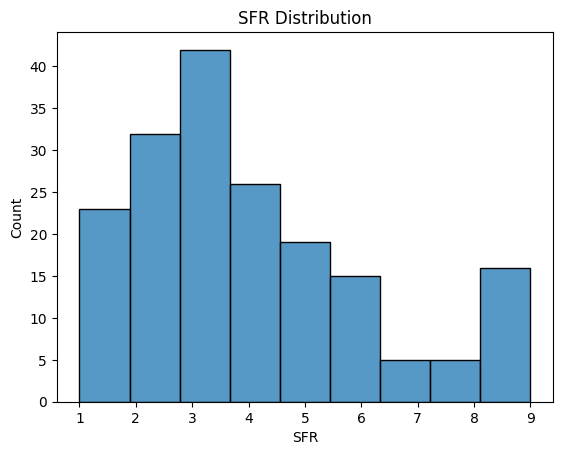

In [28]:
sns.histplot(x = 'SFR', data = df, bins = 9).set_title('SFR Distribution')

This graph shows the distribution of SpaceFund Reality (SFR). Majority of the companies SFR is between 2-4, with highest number of companies with rating 4. This shows that most of the companies have a poor score. Moreover, this poor score also affects the comapnies R&D and future missions due to lack of funding. This also shows that most of the companies in the dataset are in their initial phase of development.

##### Till now, I have visualized the distribution of the data and got a better understanding of the data. Now, I will be looking at the relationship between the SFR rating and the independent variables.

### Top 10 countries with SFR greater than 6

Text(0.5, 0, 'Number of Launches')

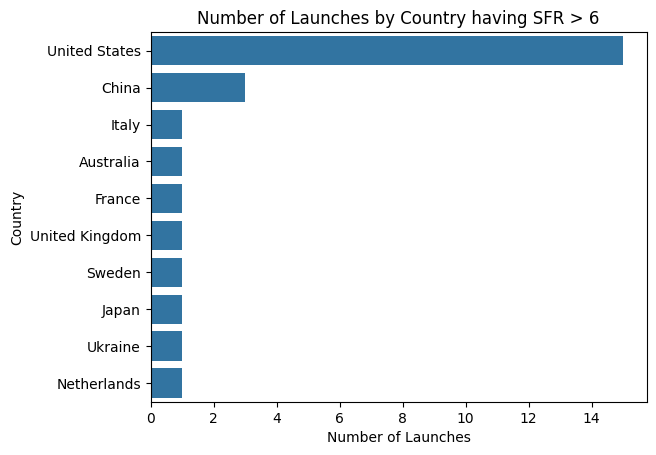

In [29]:
sns.barplot(y = 'Country', x = 'SFR', data = df[df['SFR'] > 6], estimator = len, order = df[df['SFR'] > 6]['Country'].value_counts().index).set_title('Number of Launches by Country having SFR > 6')
plt.xlabel('Number of Launches')

This shows the relation between the SFR and the country of origin. The top 10 countries with SFR greater than 6 are shown in the above graph. The graph shows that US has the highest number of companies with SFR greater than 6 which means it is preferable to invest in US companies. The second country is China, despite being third in position by number of missions, it has higher number of companies with SFR greater than 6 than UK. The rest of the countries have only 1 company with SFR greater than 6.

The SFR is not only a rating for investment but it also shows the establishment of the companies. Companies with poor rating are in their initial phase of development.

### SFR and Tech Type

Text(0.5, 1.0, 'SFR and Tech Type')

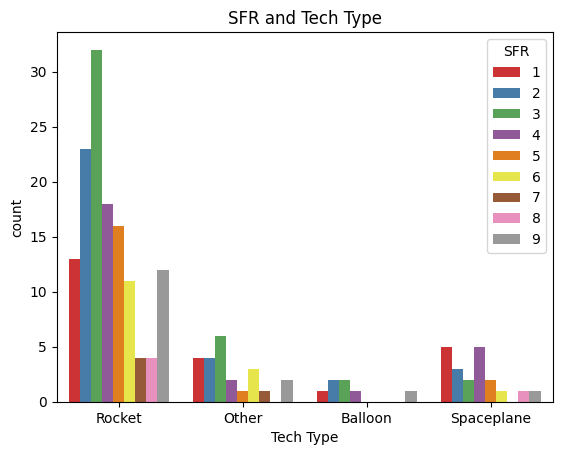

In [30]:
sns.countplot(x = 'Tech Type', data = df, hue= 'SFR', palette= 'Set1').set_title('SFR and Tech Type')

This graph shows the Tech type of the missions along with their SFR. Majority of the Rocket type missions have 2 and 3 SFR, which shows that most of the companies with rocket type mission are in their intial pahse of development. But it doesn't there are no fully developed companies. Nearly 12 rocket type missions have 9 SFR. In Spaceplane, most missions have either 1 or 4 SFR, this means either these spaceplane companies have just started their development or they have they have been in this field for significant time. But still very few nealry 1 or 2 spaceplane missions have 9 SFR. In Balloon missions, most of the missions have 2 or 3 SFR, which indicates the companies are in their initial phase of development.

### SFR and Launch Class

Text(0.5, 1.0, 'SFR and Launch Class')

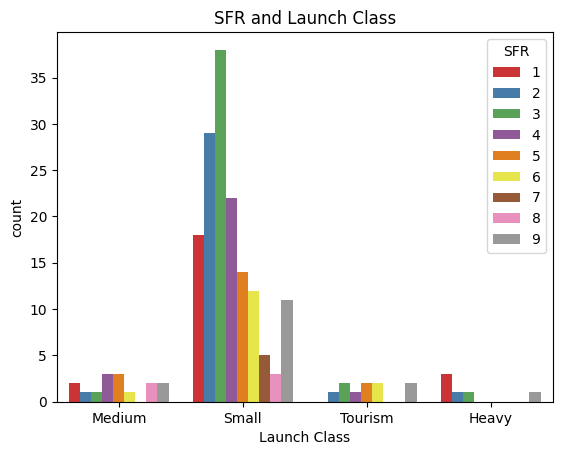

In [31]:
sns.countplot(x = 'Launch Class', data = df, hue= 'SFR', palette= 'Set1').set_title('SFR and Launch Class')

Since the Launch Class and the tech type of the mission are quite related to each other, so this graph has similar visualization to the previous one. Here the Small Launch class have 2-3 SFR similar to rocket tech type. Moreover, the medium launch class have 4 - 5 SFR, Heavy has the lowest SFR i.e 1. The tourism launch class have 5-6 SFR, which means that the companies working on space tourism are in well established phase of development.

### SFR and Orbit Altitude

Text(0.5, 1.0, 'SFR and Orbit Altitude')

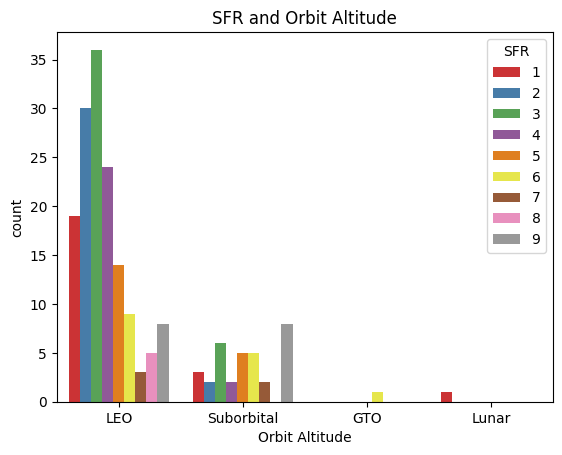

In [32]:
sns.countplot(x = 'Orbit Altitude', data = df, hue= 'SFR', palette= 'Set1').set_title('SFR and Orbit Altitude')

We can notice some similarities in the above two as well as this graph. Moat of the missions were rocket missions with small launch class which make it obvious to have a LEO orbit with similar SFR. However, the suborbital missions have the highest 9 SFR, wich shows the suborbital mission companies are well established. Very few missions are in GTO and Lunar orbit, which shows that the companies working on these missions are in their initial phase of development.

### SFR and Description

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Launch Vehicle Development'),
  Text(1, 0, 'Launch Services'),
  Text(2, 0, 'Balloon-Based Technologies'),
  Text(3, 0, 'Space Access and Technology Innovation'),
  Text(4, 0, 'Satellite Technology and Services'),
  Text(5, 0, 'Space Tourism Suborbital'),
  Text(6, 0, 'Innovative Propulsion Technologies')])

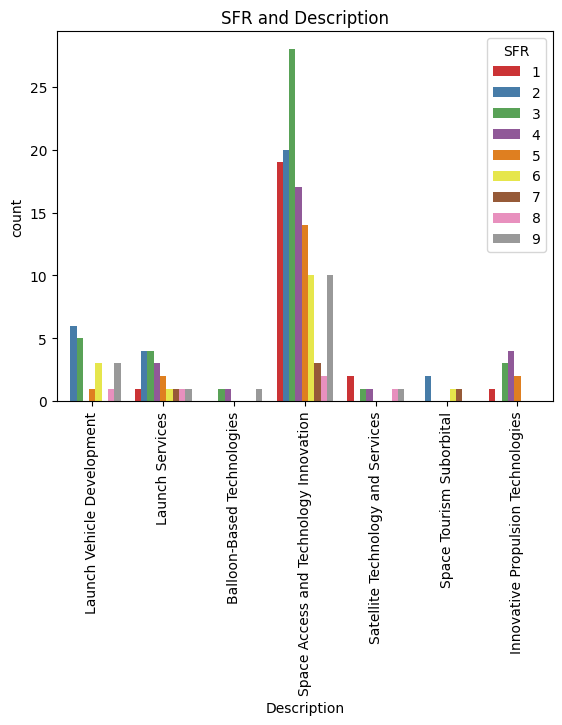

In [33]:
sns.countplot(x = 'Description', data = df, hue= 'SFR', palette= 'Set1').set_title('SFR and Description')
plt.xticks(rotation=90)

### SFR and Payload

C:\Users\Dell\AppData\Local\Temp\ipykernel_10808\1524839893.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'SFR', y = 'Payload (kg)', data = df, ax = ax[0], palette = 'Set1').set_title('SFR and Payload')
C:\Users\Dell\AppData\Local\Temp\ipykernel_10808\1524839893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'SFR', y = 'Payload (kg)', data = df, ax = ax[1], palette = 'Set1').set_title('SFR and Payload')


Text(0.5, 1.0, 'SFR and Payload')

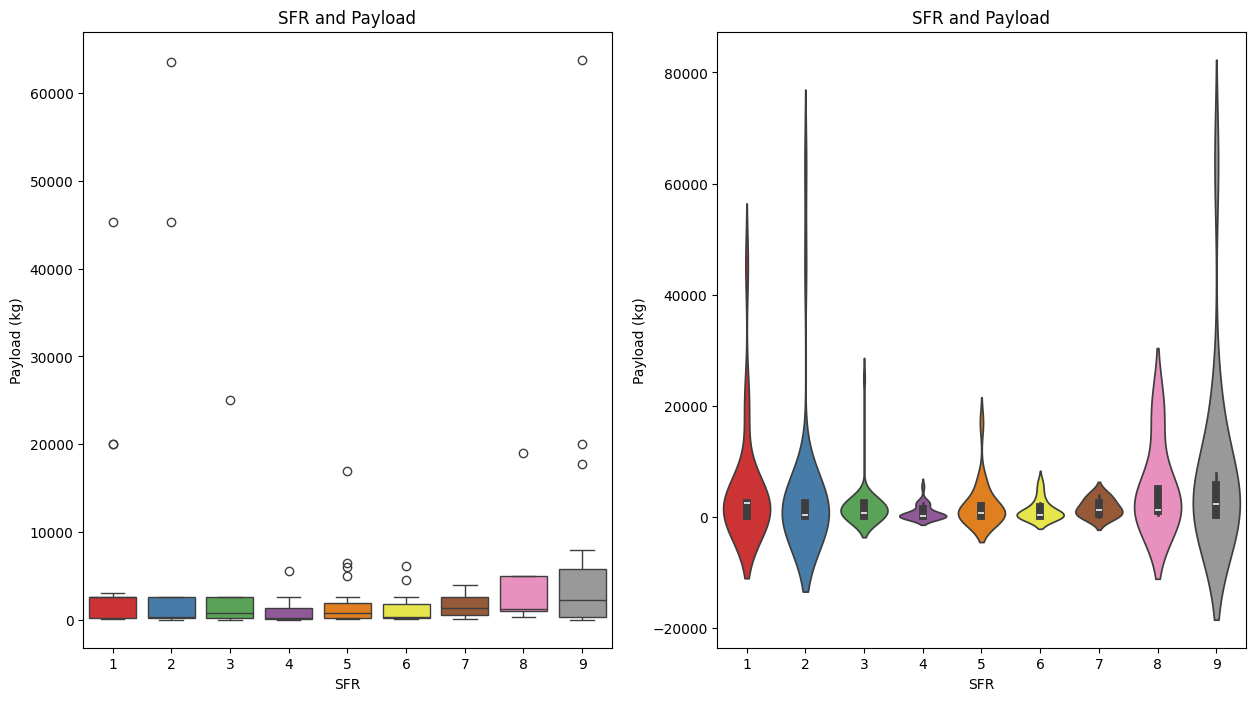

In [34]:
fig, ax = plt.subplots(1,2,figsize=(15, 8))
sns.boxplot(x = 'SFR', y = 'Payload (kg)', data = df, ax = ax[0], palette = 'Set1').set_title('SFR and Payload')
sns.violinplot(x = 'SFR', y = 'Payload (kg)', data = df, ax = ax[1], palette = 'Set1').set_title('SFR and Payload')

These graphs shows the relation between the mission payload mass and the SFR. Here in the both the graphs we can see the trend of increasing SFR with increasing mission payload. This means, the companies which are well established will be able to take more payload to space. The companies with poor SFR are in their initial phase of development and are not capable of taking heavy payloads to space.

Moreover, the bosplot also highlights the presence of outliers in the dataset. These outliers would be removed in the data preprocessing part 2.

### SFR and Launch Cost

C:\Users\Dell\AppData\Local\Temp\ipykernel_10808\2617777887.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'SFR', y = 'Launch Cost ($M)', data = df, ax = ax[0], palette = 'Set1').set_title('SFR and Launch Cost')
C:\Users\Dell\AppData\Local\Temp\ipykernel_10808\2617777887.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'SFR', y = 'Launch Cost ($M)', data = df, ax = ax[1], palette = 'Set1').set_title('SFR and Launch Cost')


Text(0.5, 1.0, 'SFR and Launch Cost')

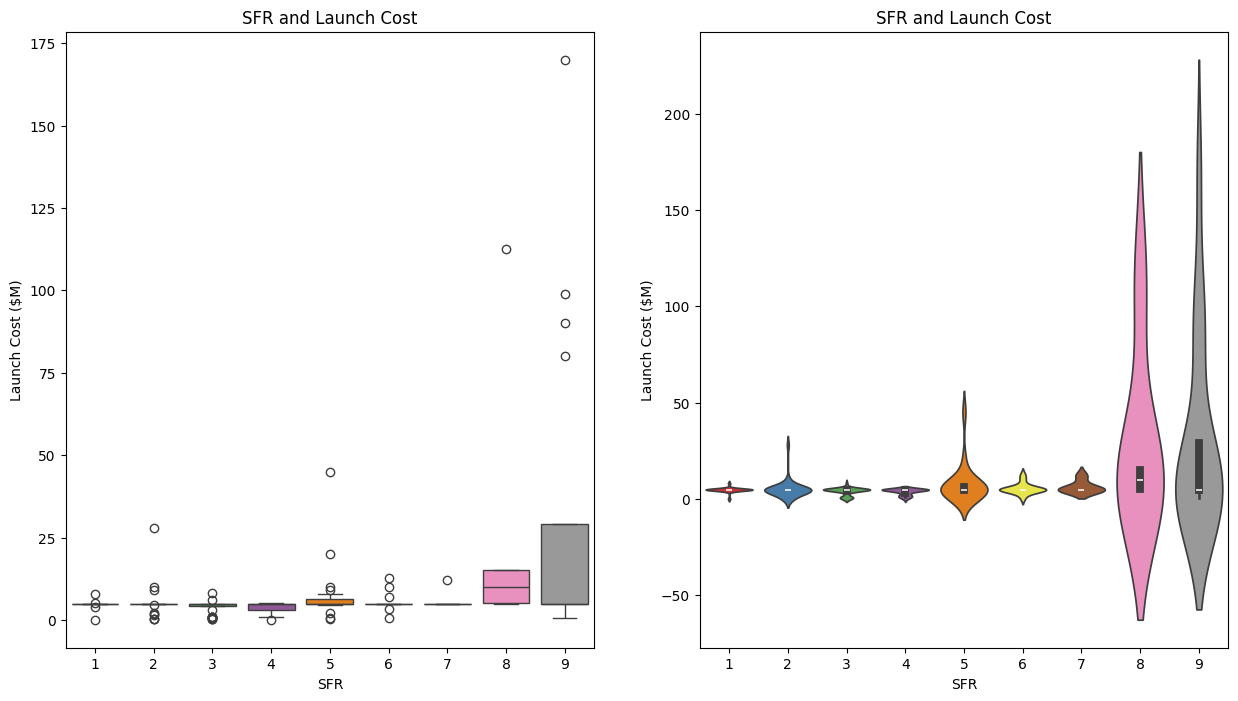

In [35]:
fig, ax = plt.subplots(1,2,figsize=(15, 8))
sns.boxplot(x = 'SFR', y = 'Launch Cost ($M)', data = df, ax = ax[0], palette = 'Set1').set_title('SFR and Launch Cost')
sns.violinplot(x = 'SFR', y = 'Launch Cost ($M)', data = df, ax = ax[1], palette = 'Set1').set_title('SFR and Launch Cost')

These graphs shows the relation between the mission cost and the SFR. In the both the graphs there is a similar trend of increase in SFR with increasing launch cost. This means, the companies which are well established will be able to spend more money on their missions. The companies with poor SFR are in their initial phase of development and are not capable of spending more money on their missions.

Moreover, the bosplot also highlights the presence of outliers in the dataset. These outliers would be removed in the data preprocessing part 2.

## Data Preprocessing Part 2

In [36]:
#dropping column country and company name because the SFR is dependent upon the mission specific parameters
df.drop(columns = ['Country', 'Company'], axis=1, inplace=True)

### Outlier removal

In [37]:
#Using Z score to remove outliers
cols = ['Payload (kg)', 'Launch Cost ($M)']
from scipy import stats
z = np.abs(stats.zscore(df[cols]))
df = df[(z < 3).all(axis=1)]

### Label Encoding the object type columns

In [38]:
from sklearn.preprocessing import LabelEncoder

#Label Encoding Object
le = LabelEncoder()

#object type columns
obj_cols = ['Launch Class', 'Orbit Altitude', 'Tech Type', 'Description']

#Label Encoding
for i in obj_cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique(), '\n')

Launch Class [2 3 1 0] 

Orbit Altitude [1 3 0 2] 

Tech Type [2 1 0 3] 

Description [2 0 5 3 4 6 1] 



Converting SFR to binary column. All the SFR greater than equal to 6 are considered as 1 and less than 6 are considered as 0.

In [39]:
df['SFR'] = df['SFR'].apply(lambda x: 1 if x > 6 else 0)

## Coorelation Matrix Heatmap

<Axes: >

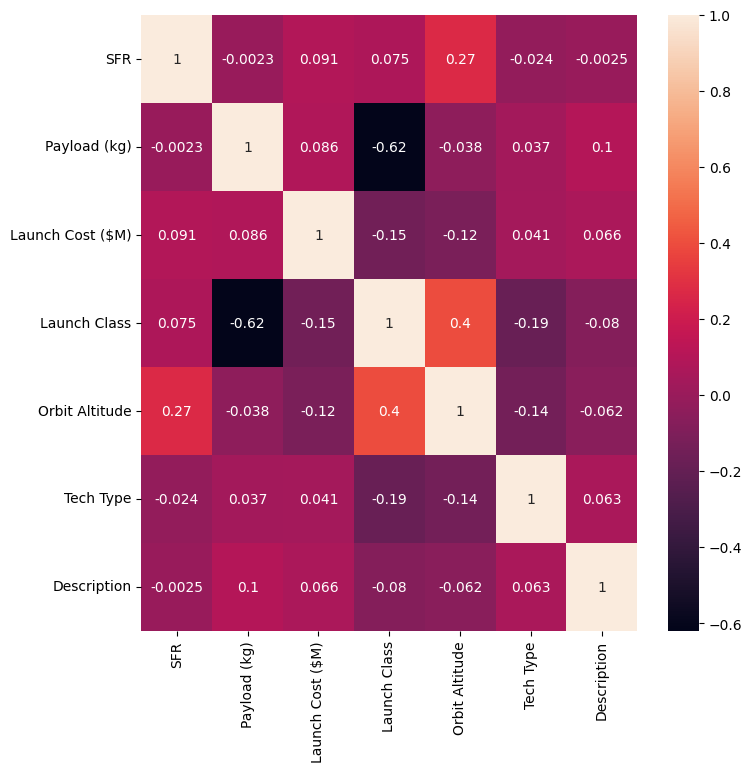

In [40]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

## Train Test Split

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'SFR', axis=1), df['SFR'], test_size=0.3, random_state=0)

## Model Building
I will be using the following models:
1. Random Forest Classifier
2. Decision Tree Classifier

### Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest Classifier Object
rfc = RandomForestClassifier()

#### Hyperparameter Tuning with GridSearchCV

In [43]:
from sklearn.model_selection import GridSearchCV

#parameters for GridSearchCV
para_grid = {
    'min_samples_split': [2,4,6,8],
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'random_state': [0,42]
}

#GridSearchCV Object
grid = GridSearchCV(estimator=rfc, param_grid=para_grid, cv=5, verbose=2, n_jobs=-1)

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [44]:
#model with best parameters
rfc = RandomForestClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=2, random_state=0)

#Fitting the model
rfc.fit(X_train, y_train)

#training accuracy
print('Training Accuracy: ', rfc.score(X_train, y_train))

#prediction
r_pred = rfc.predict(X_test)

Training Accuracy:  0.8852459016393442


### Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Classifier Object
dtc = DecisionTreeClassifier()

#### Hyperparameter Tuning with GridSearchCV

In [46]:
from sklearn.model_selection import GridSearchCV

#parameters for GridSearchCV
para_grid = {
    'min_samples_split': [2,4,6,8],
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'random_state': [0,42]
}

#GridSearchCV Object
grid = GridSearchCV(estimator=dtc, param_grid=para_grid, cv=5, verbose=2, n_jobs=-1)

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}


In [47]:
#model with best parameters
dtc = DecisionTreeClassifier(max_depth=2, min_samples_leaf=6, min_samples_split=2, random_state=0)

#Fitting the model
dtc.fit(X_train, y_train)

#training accuracy
print('Training Accuracy: ', dtc.score(X_train, y_train))

#prediction
d_pred = dtc.predict(X_test)

Training Accuracy:  0.8852459016393442


## Model Evaluation

### Confusion Matrix

Text(0.5, 1.0, 'Decision Tree Classifier')

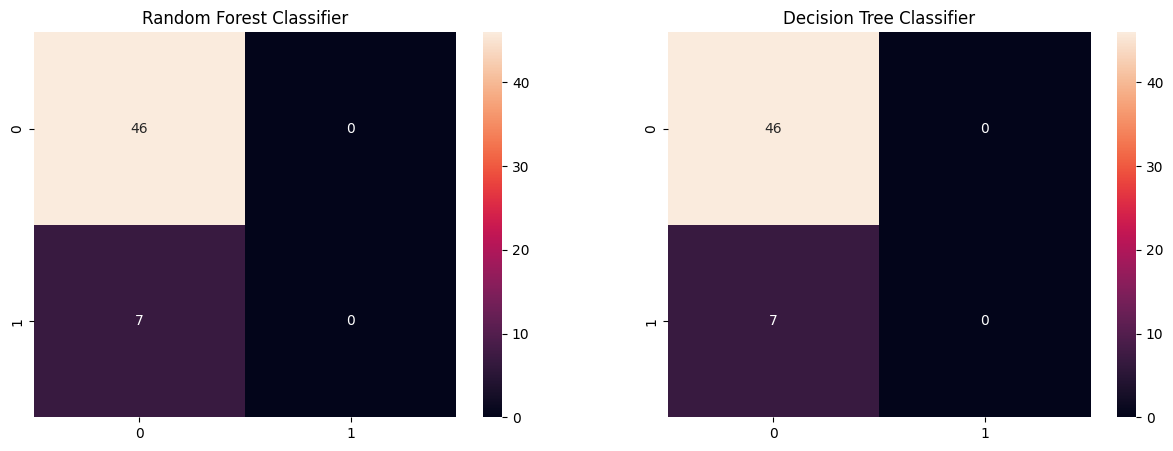

In [48]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(1,2,figsize=(15, 5))
sns.heatmap(confusion_matrix(y_test, r_pred), annot=True, ax=ax[0], fmt='g').set_title('Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, ax=ax[1], fmt='g').set_title('Decision Tree Classifier')

### Distribution Plot

C:\Users\Dell\AppData\Local\Temp\ipykernel_10808\2519612094.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, ax=ax[0], color = 'r').set_title('Random Forest Classifier')
C:\Users\Dell\AppData\Local\Temp\ipykernel_10808\2519612094.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(r_p

<Axes: title={'center': 'Decision Tree Classifier'}, xlabel='SFR', ylabel='Density'>

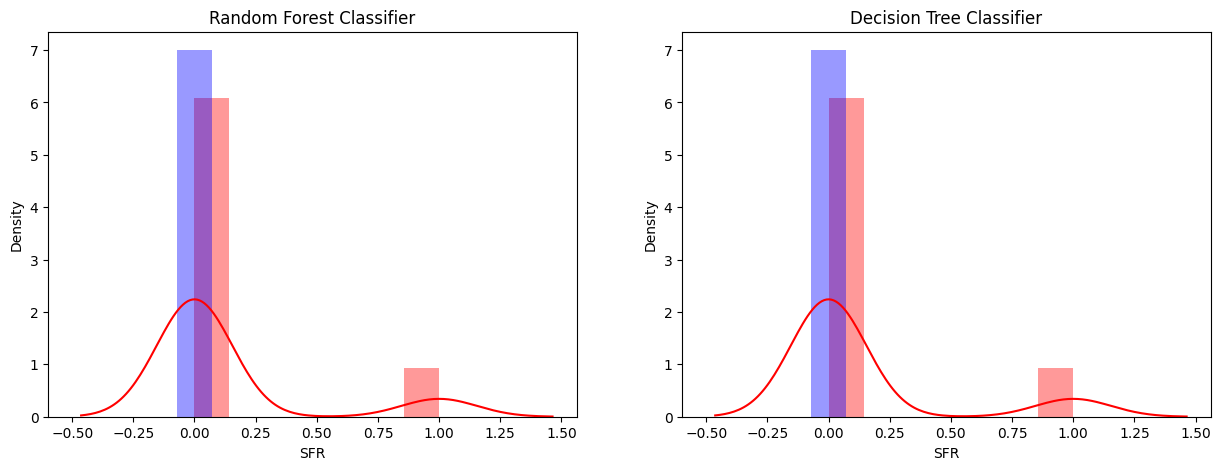

In [49]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
sns.distplot(y_test, ax=ax[0], color = 'r').set_title('Random Forest Classifier')
sns.distplot(r_pred, ax=ax[0], color = 'b')
sns.distplot(y_test, ax=ax[1], color = 'r').set_title('Decision Tree Classifier')
sns.distplot(d_pred, ax=ax[1], color = 'b')

### Classification Report

In [50]:
from sklearn.metrics import classification_report

print('Random Forest Classifier\n', classification_report(y_test, r_pred),'\n')
print('Decision Tree Classifier\n', classification_report(y_test, d_pred))

Random Forest Classifier
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        46
           1       0.00      0.00      0.00         7

    accuracy                           0.87        53
   macro avg       0.43      0.50      0.46        53
weighted avg       0.75      0.87      0.81        53
 

Decision Tree Classifier
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        46
           1       0.00      0.00      0.00         7

    accuracy                           0.87        53
   macro avg       0.43      0.50      0.46        53
weighted avg       0.75      0.87      0.81        53



e:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precisi

## Conclusion

From the exploratory data analysis, I have conclded that most of the companies in the dataset were from US which resulted in greater comapnies with good SFR from US. However, in case of China, the number of companies is less than UK, but still it ranks secound with number of companies with SFR greater than 6. Majority of the missions were rocket type, small launch class and Low Earth Orbit missions. This relation has been found due to similar SFR distribution in their resspective graphs, where most of the missions have 2-3 SFR.

There has been a similar relationship of launch cost and payload with the SFR. Missions with higher launch cost and higher payload have higher SFR. This shows that the companies which are well established will be able to take more payload to space and spend more money on their missions. The companies with poor SFR are in their initial phase of development and are not capable of taking heavy payloads to space and spending more money on their missions.

Coming to the machine learning models, I have used Decision Tree and Random Forest Classifier. Both the models have given similar result with similar accuracy, i.e. 87%. However, due to small dataset, the models had very poor recall score in predictiong the SFR greater than 6. This could be improved by increasing the dataset.